In [1]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.7 MB/s eta 0:00:00


#Importing the necessary libraries

In [20]:
# Install the following packages
import praw
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timezone, timedelta
import yfinance as yf

In [38]:

from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
import nltk
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

### Step 1: Reddit Details

In [39]:
# Step 1: Authenticate with Reddit API
reddit = praw.Reddit(
    client_id="YOUR_CLIENT_ID",  # Replace with your Reddit app client ID
    client_secret="YOUR_CLIENT_SECRET",  # Replace with your Reddit app client secret
    user_agent="YOUR_USER_AGENT"  # Example: "RedditScraper by /u/YourRedditUsername"
)

### Step 2: Scrap Data from Subreddits

In [40]:
#Step 2: Define subreddits, keyword, and date range
subreddits = ["stocks", "investing", "finance", "wallstreetbets", "StockMarket",
              "options", "financialindependence", "cryptocurrency", "Daytrading",
              "quantfinance", "economy"]  # List of subreddits to scrape
keyword = "Tesla"  # Keyword to search for

# Define the date range
start_date = datetime(2019, 11, 1, tzinfo=timezone.utc)  # Start date (UTC)
end_date = datetime(2024, 11, 15, tzinfo=timezone.utc)  # End date (UTC)

# List to store posts
posts = []

# Fetching posts from each subreddit
for subreddit_name in subreddits:
    print(f"Fetching posts from subreddit: {subreddit_name},")

    # Get the subreddit
    subreddit = reddit.subreddit(subreddit_name)

    # Search posts with the keyword
    for submission in subreddit.search(keyword, limit=100):  # Limit to 100 posts
        # Filter based on the date range
        created_at = datetime.utcfromtimestamp(submission.created_utc).replace(tzinfo=timezone.utc)

        if start_date <= created_at <= end_date:
            # Prepare post data
            post_data = {
                "title": submission.title,
                "subreddit": subreddit_name ,
                "num_comments": submission.num_comments,
                "upvote_ratio": submission.upvote_ratio,
                "body": submission.selftext if submission.selftext else "[No text content, link post]",
                "created_at": created_at.strftime('%Y-%m-%d')
            }
            posts.append(post_data)

# Convert posts to a DataFrame
df = pd.DataFrame(posts)

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from subreddit: stocks,


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from subreddit: investing,


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from subreddit: finance,


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from subreddit: wallstreetbets,


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from subreddit: StockMarket,


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from subreddit: options,


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from subreddit: financialindependence,


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from subreddit: cryptocurrency,


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from subreddit: Daytrading,


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts from subreddit: quantfinance,
Fetching posts from subreddit: economy,


In [41]:
df

,title,subreddit,num_comments,upvote_ratio,body,created_at
0,Elon Musk’s Trump bet has paid off so well tha...,stocks,762,0.86,[https://fortune.com/2024/11/11/elon-musk-dona...,2024-11-11
1,Data confirms Musk's destruction of the Tesla ...,stocks,1687,0.88,"📉 last Fall, the proportion of Democrats buyin...",2024-04-22
2,"According to a Morgan Stanley analyst, the Opt...",stocks,271,0.96,"[No text content, link post]",2024-10-13
3,Tesla shares close down 12% after earnings mis...,stocks,486,0.94,Tesla shares plummeted the most since 2020 aft...,2024-07-24
4,Tesla's self-driving tech ditched by 98 percen...,stocks,662,0.90,"""A staggering 98 percent of Tesla owners decid...",2024-05-16
...,...,...,...,...,...,...
800,U.S. Labor Department awards $1M to help laid-...,economy,10,0.93,"[No text content, link post]",2024-07-26
801,Elon Musk goes ‘absolutely hard core’ in anoth...,economy,23,0.90,"[No text content, link post]",2024-04-30
802,Tesla Billionaire Elon Musk Issues $35 Trillio...,economy,9,0.29,"[No text content, link post]",2024-10-04
803,"Hackers Breach Thousands of Security Cameras, ...",economy,38,0.98,"[No text content, link post]",2021-03-09


### Step 3: Collect Corresponding Opening and Closing Prices of Stock from yfinance

In [7]:
!pip install yfinance pandas

In [45]:
def get_open_close_next_trading_day(ticker, dates):
    # Fetch historical data for a range of dates
    start_date = min(dates)  # Earliest requested date
    end_date = max(dates) + pd.Timedelta(days=7)  # Buffer of 7 days
    stock_data = yf.download(ticker, start=start_date, end=end_date)

    results = []
    for date in dates:
        # Ensure date is in proper format
        date = pd.Timestamp(date)
        # Find the next available trading daystock_data.loc[next_trading_date, 'Open'][ticker]
        next_trading_date = stock_data.loc[date:].first_valid_index()
        if next_trading_date:
            # Extract scalar values for Open and Close prices
            open_price = stock_data.loc[next_trading_date,  'Open'][ticker]
            close_price =stock_data.loc[next_trading_date, 'Close'][ticker]
            results.append((date.date(), open_price, close_price))
        else:
            results.append((date.date(), None, None))  # No data available

    return pd.DataFrame(results, columns=["created_at", "Open", "Close"])

# Assuming your original dataframe 'df' includes 'created_at' and 'body' columns
# Ensure 'created_at' is in datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract 'body' and 'created_at' from df
dates = pd.to_datetime(df['created_at'])
bodies = df['body']

# Fetch stock data with open and close prices
df_price = get_open_close_next_trading_day("TSLA", dates)

# Add 'body' to the resulting df_price based on the 'created_at' column
df_price['body'] = bodies.values  # Ensure the indices match

# Display the merged DataFrame with 'body', 'Open', and 'Close'
print(df_price.head())


[*********************100%***********************]  1 of 1 completed


   created_at        Open       Close  \
0  2024-11-11  346.299988  350.000000   
1  2024-04-22  140.559998  142.050003   
2  2024-10-13  220.130005  219.160004   
3  2024-07-24  225.419998  215.990005   
4  2024-05-16  174.100006  174.839996   

                                                body  
0  [https://fortune.com/2024/11/11/elon-musk-dona...  
1  📉 last Fall, the proportion of Democrats buyin...  
2                       [No text content, link post]  
3  Tesla shares plummeted the most since 2020 aft...  
4  "A staggering 98 percent of Tesla owners decid...  


### Step 4: Remove Rows having No Content in the `body`

In [50]:
df=df_price
# Remove rows where the 'body' column contains '[No text content, link post]'
df = df[df['body'] != '[No text content, link post]']
df=df[['body','Open','Close']]

In [51]:
df

,body,Open,Close
0,[https://fortune.com/2024/11/11/elon-musk-dona...,346.299988,350.000000
1,"📉 last Fall, the proportion of Democrats buyin...",140.559998,142.050003
3,Tesla shares plummeted the most since 2020 aft...,225.419998,215.990005
4,"""A staggering 98 percent of Tesla owners decid...",174.100006,174.839996
5,Shares of electric vehicle maker Tesla tumbled...,220.130005,217.800003
...,...,...,...
747,"“Prior to the earnings announcement, Tesla sha...",244.679993,260.480011
761,Tesla Wednesday reported an unexpected improve...,217.130005,213.649994
771,https://preview.redd.it/aatqhobiyrod1.jpg?widt...,229.300003,226.779999
789,https://preview.redd.it/1rivefblvjud1.jpg?widt...,220.130005,219.160004


### Step 5: Remove Rows where the Absolute Difference between `Open` and `Close` is Less than 3

In [52]:
df = df[abs(df['Close'] - df['Open']) > 3]
#im taking the tweets only which creates a significant difference in prices, so my model can learn properly

### Step 6: Create a New Column `Target` with 1 when `df['Close'] - df['Open'] > 0` and 0 otherwise.

In [53]:
df['Target'] = (df['Close'] - df['Open'] > 0).astype(int)


<ipython-input-53-1b8c313af24a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = (df['Close'] - df['Open'] > 0).astype(int)


In [54]:
df

,body,Open,Close,Target
0,[https://fortune.com/2024/11/11/elon-musk-dona...,346.299988,350.000000,1
3,Tesla shares plummeted the most since 2020 aft...,225.419998,215.990005,0
7,Elon Musk has dismissed two Tesla senior execu...,186.979996,183.279999,0
8,Tesla reported weaker-than-expected earnings f...,253.600006,246.380005,0
10,"***On Fortune****:* \n\n""*Wall Street’s stance...",167.770004,162.500000,0
...,...,...,...,...
708,Little bit of up and a little bit of down… We ...,229.500000,220.190002,0
722,https://preview.redd.it/ejn75gei93fd1.jpg?widt...,224.899994,232.100006,1
747,"“Prior to the earnings announcement, Tesla sha...",244.679993,260.480011,1
761,Tesla Wednesday reported an unexpected improve...,217.130005,213.649994,0


### Step 7: Creating WordClout

In [59]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk


In [60]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [61]:
def clean(text):
    wn = nltk.WordNetLemmatizer()
    stopword = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    lower = [word.lower() for word in tokens]
    no_stopwords = [word for word in lower if word not in stopword]
    no_alpha = [word for word in no_stopwords if word.isalpha()]
    lemm_text = [wn.lemmatize(word) for word in no_alpha]
    clean_text = lemm_text
    return clean_text

In [62]:

def generate_wordcloud(words,sentiment):
    plt.figure(figsize=(16,13))
    wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
    wc.generate(words)
    plt.title("Most common {} words".format(sentiment), fontsize=20)
    plt.imshow(wc.recolor(colormap='Pastel2', random_state=17), alpha=0.98)
    plt.axis('off')

imdb=df.head(1000)
print("Processing data...")

Processing data...


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-64-522d4802442f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['clean']=imdb['body'].map(clean)
<ipython-input-64-522d4802442f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb['clean_text']=imdb['clean'].apply(lambda x: " ".join([str(word) for word in x]))


Creating word clouds...


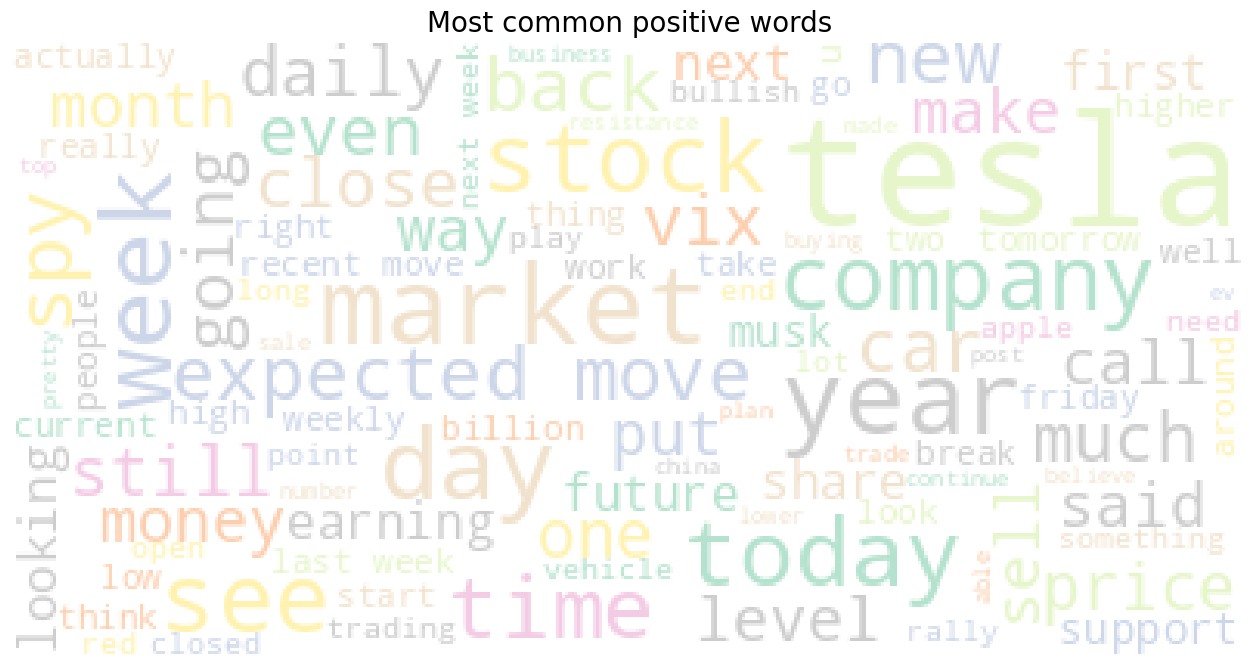

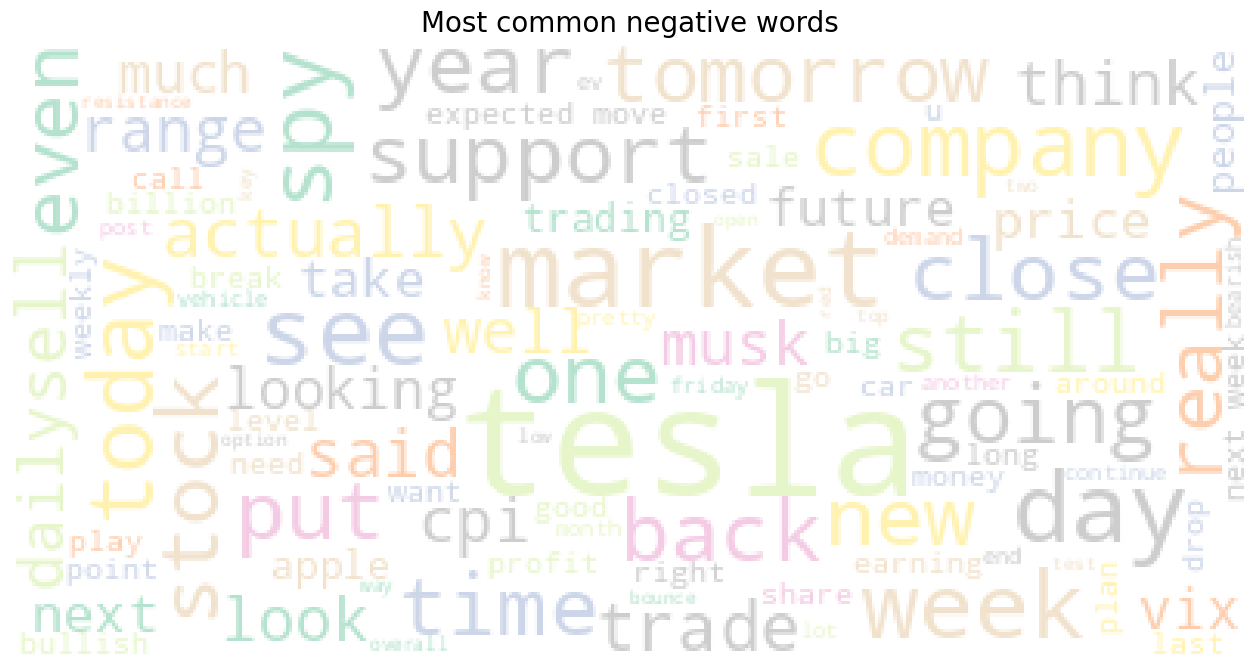

In [64]:
nltk.download('wordnet')

imdb['clean']=imdb['body'].map(clean)
imdb['clean_text']=imdb['clean'].apply(lambda x: " ".join([str(word) for word in x]))

print("Creating word clouds...")
positive_words=" ".join(imdb[imdb.Target==1]['clean_text'].values)
negative_words=" ".join(imdb[imdb.Target==0]['clean_text'].values)

generate_wordcloud(positive_words,"positive")
generate_wordcloud(negative_words,"negative")

### Step 8: Data Cleaning

In [65]:
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9%$]+"

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

print(len(STOP_WORDS))


text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9%$]+"
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in STOP_WORDS:
      if stem:
        tokens.append(lemmatizer.lemmatize(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

326


In [66]:
df['body'] = df['body'].apply(lambda x: preprocess(x))

<ipython-input-66-70265ac39987>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['body'] = df['body'].apply(lambda x: preprocess(x))


### Step 9: Tokenisation

In [67]:

# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
X = tfidf.fit_transform(df['body'])
y = df['Target']


### Step 10: Fitting Models

In [69]:
SEED=93
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=SEED)

# Models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=SEED),
    "SVM (linear kernel)": SVC(kernel='linear', random_state=SEED),
    "SVM (rbf kernel)": SVC(kernel='rbf', random_state=SEED),
    "SVM (poly kernel)": SVC(kernel='poly', random_state=42),
    "Passive Aggressive": PassiveAggressiveClassifier(random_state=SEED),
    "Random Forest": RandomForestClassifier(random_state=SEED),
    "Decision Tree": DecisionTreeClassifier(random_state=SEED),
    "Naive Bayes": MultinomialNB(),
}

# Train models and display classification reports
for name, model in models.items():
    print(f"Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("-" * 80)


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.79      0.88      0.83        17

    accuracy                           0.81        32
   macro avg       0.82      0.81      0.81        32
weighted avg       0.82      0.81      0.81        32

--------------------------------------------------------------------------------
Model: SVM (linear kernel)
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        15
           1       0.81      0.76      0.79        17

    accuracy                           0.78        32
   macro avg       0.78      0.78      0.78        32
weighted avg       0.78      0.78      0.78        32

--------------------------------------------------------------------------------
Model: SVM (rbf kernel)
              precision    recall  f1-score   support

           0       0.71      0.33      0.45        